# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Create connection to database
conn= sqlite3.connect("data.sqlite")

In [2]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,orderdetails
1,payments
2,offices
3,customers
4,orders
5,productlines
6,products
7,employees


### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [3]:
# Replace None with your code
pd.read_sql("""SELECT customerNumber, customerName, state, creditLimit
    FROM customers
    WHERE state = 'CA'
      AND creditLimit > 25000; """, conn)

,customerNumber,customerName,state,creditLimit
0,124,Mini Gifts Distributors Ltd.,CA,210500.00
1,129,Mini Wheels Co.,CA,64600.00
2,161,Technics Stores Inc.,CA,84600.00
3,205,Toys4GrownUps.com,CA,90700.00
4,219,Boards & Toys Co.,CA,11000.00
5,239,Collectable Mini Designs Co.,CA,105000.00
6,321,Corporate Gift Ideas Co.,CA,105000.00
7,347,"Men 'R' US Retailers, Ltd.",CA,57700.00
8,450,The Sharp Gifts Warehouse,CA,77600.00
9,475,West Coast Collectables Co.,CA,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [10]:
# Replace None with your code
pd.read_sql(""" SELECT customerNumber, customerName, country
FROM customers
WHERE country != 'USA'
  AND customerName LIKE '%Collect%';""",conn)


,customerNumber,customerName,country
0,114,"Australian Collectors, Co.",Australia
1,189,"Clover Collections, Co.",Ireland
2,201,"UK Collectables, Ltd.",UK
3,211,"King Kong Collectables, Co.",Hong Kong
4,227,Heintze Collectables,Denmark
5,260,"Royal Canadian Collectables, Ltd.",Canada
6,293,BG&E Collectables,Switzerland
7,353,Reims Collectables,France
8,376,Precious Collectables,Switzerland
9,382,Salzburg Collectables,Austria


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

In above query WHERE clause act as a filter.
1. It includes customer who are not in USA BY  country != 'USA'
    This ensures we’re only looking at international customers.
2.  The LIKE operator is a way of saying “look for a word or pattern in the name.”
    The % symbols mean “anything before or after the word Collect is okay.”
    So names like “EuroCollectibles” or “Global Collectors Ltd” will match.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [13]:
# Replace None with your code  
#Look only at USA customers.
#Group them by state.
#Compute the average credit limit per state.
q= """SELECT country,state, avg(creditLimit) as avg_credit
      FROM customers 
      WHERE country = 'USA' 
      GROUP BY state 
      ORDER BY avg_credit DESC; """
df = pd.read_sql(q, conn)
df

,country,state,avg_credit
0,USA,NH,114200.000000
1,USA,NY,89966.666667
2,USA,PA,84766.666667
3,USA,CA,83854.545455
4,USA,NV,71800.000000
5,USA,MA,70755.555556
6,USA,CT,57350.000000
7,USA,NJ,43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

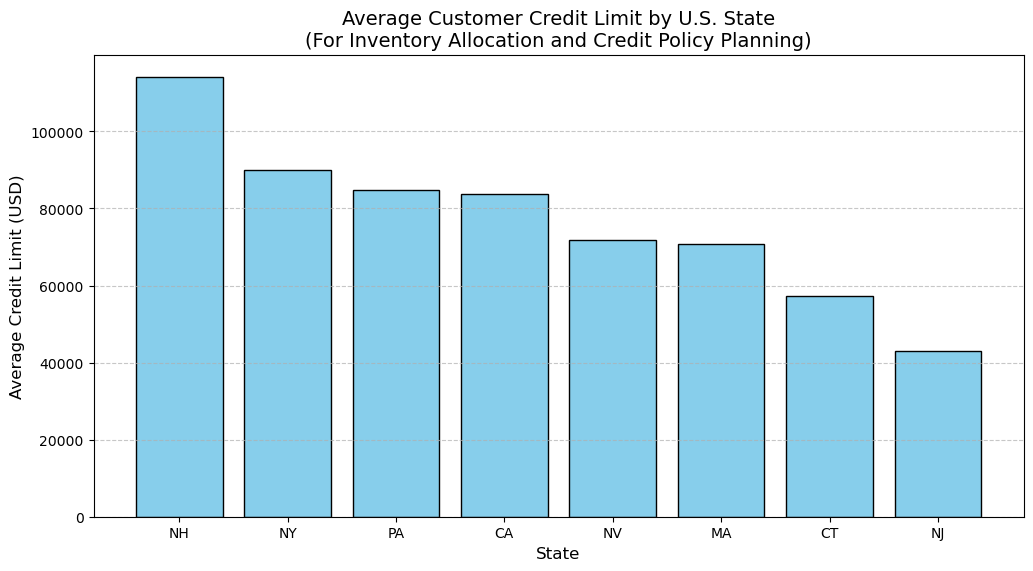

In [15]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
import matplotlib.pyplot as plt
df= df = df.sort_values("avg_credit", ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(df["state"], df["avg_credit"], color="skyblue", edgecolor="black")

# Labels and title
plt.title("Average Customer Credit Limit by U.S. State\n(For Inventory Allocation and Credit Policy Planning)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Credit Limit (USD)", fontsize=12)

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.
Join the customers table (for the customer name) with the payments table (for payment amounts).
Aggregate (SUM) payments per customer.
Order from highest to lowest.
Limit to the top 10.


In [17]:
# Replace None with your code
q1=""" SELECT c.customerNumber,
       c.customerName,
       SUM(p.amount) AS total_payments
       FROM customers c
         JOIN payments p
           ON c.customerNumber = p.customerNumber
      GROUP BY c.customerNumber, c.customerName
      ORDER BY total_payments DESC
      LIMIT 10; """ 
df1= pd.read_sql(q1,conn)
df1

,customerNumber,customerName,total_payments
0,141,Euro+ Shopping Channel,715738.98
1,124,Mini Gifts Distributors Ltd.,584188.24
2,114,"Australian Collectors, Co.",180585.07
3,151,Muscle Machine Inc,177913.95
4,148,"Dragon Souveniers, Ltd.",156251.03
5,323,"Down Under Souveniers, Inc",154622.08
6,187,"AV Stores, Co.",148410.09
7,276,"Anna's Decorations, Ltd",137034.22
8,321,Corporate Gift Ideas Co.,132340.78
9,146,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

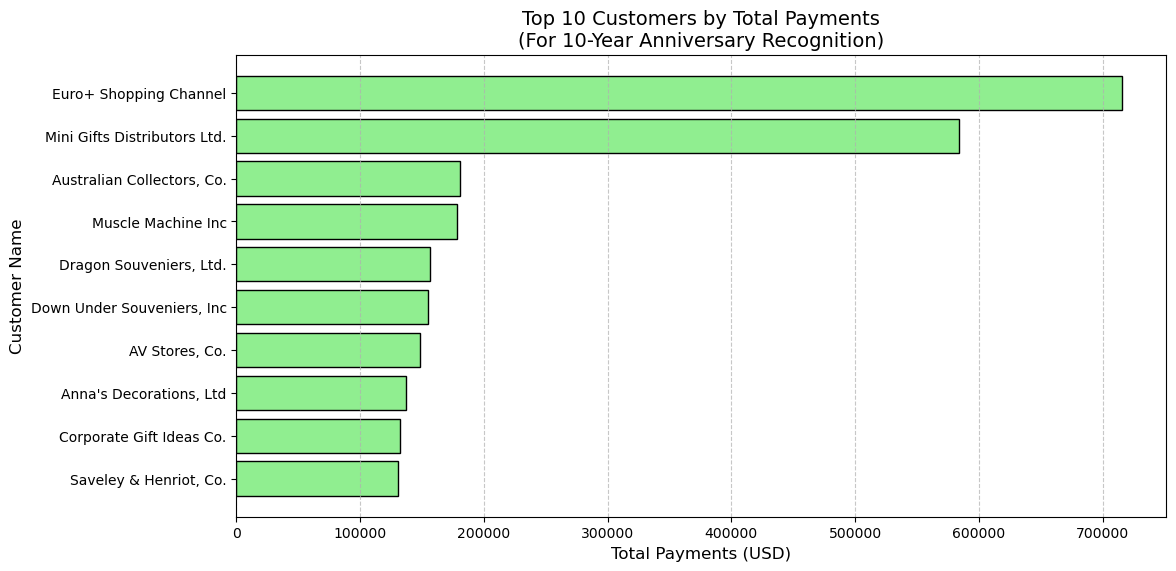

In [19]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
df1 = df1.sort_values("total_payments", ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.barh(df1["customerName"], df1["total_payments"], color="lightgreen", edgecolor="black")

# Labels and title
plt.title("Top 10 Customers by Total Payments\n(For 10-Year Anniversary Recognition)", fontsize=14)
plt.xlabel("Total Payments (USD)", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)

# Flip y-axis so highest is at top
plt.gca().invert_yaxis()

# Add gridlines for readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [21]:
# Replace None with you code
q2= """SELECT c.customerNumber,
              c.customerName,
              p.productCode,
              p.productName,
       SUM(od.quantityOrdered) AS total_quantity
      FROM customers c
      JOIN orders o
           ON c.customerNumber = o.customerNumber
      JOIN orderdetails od
           ON o.orderNumber = od.orderNumber
      JOIN products p
           ON od.productCode = p.productCode
      GROUP BY c.customerNumber, c.customerName, p.productCode, p.productName
      HAVING SUM(od.quantityOrdered) >= 10
      ORDER BY total_quantity ASC; """
df2=pd.read_sql(q2, conn)
df2

,customerNumber,customerName,productCode,productName,total_quantity
0,314,Petit Auto,S18_2949,1913 Ford Model T Speedster,10
1,412,"Extreme Desk Decorations, Ltd",S24_4620,1961 Chevrolet Impala,10
2,119,La Rochelle Gifts,S32_2509,1954 Greyhound Scenicruiser,11
3,328,Tekni Collectables Inc.,S700_1691,American Airlines: B767-300,11
4,450,The Sharp Gifts Warehouse,S24_3191,1969 Chevrolet Camaro Z28,13
...,...,...,...,...,...
2526,141,Euro+ Shopping Channel,S24_3432,2002 Chevy Corvette,174
2527,141,Euro+ Shopping Channel,S12_4473,1957 Chevy Pickup,183
2528,141,Euro+ Shopping Channel,S24_1444,1970 Dodge Coronet,197
2529,141,Euro+ Shopping Channel,S24_2840,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [29]:
# Replace None with your code
q3= """SELECT
    productLine AS ProductLineName,
    COUNT(DISTINCT productCode) AS NumberOfProducts,
    SUM(quantityInStock) AS TotalQuantityInStock
FROM Products
GROUP BY productLine
ORDER BY TotalQuantityInStock DESC;"""

df3= pd.read_sql(q3,conn)
df3

,ProductLineName,NumberOfProducts,TotalQuantityInStock
0,Classic Cars,38,219183
1,Vintage Cars,24,124880
2,Motorcycles,13,69401
3,Planes,12,62287
4,Trucks and Buses,11,35851
5,Ships,9,26833
6,Trains,3,16696


In [35]:
pd.read_sql("select * from employees",conn)

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143,Sales Rep


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

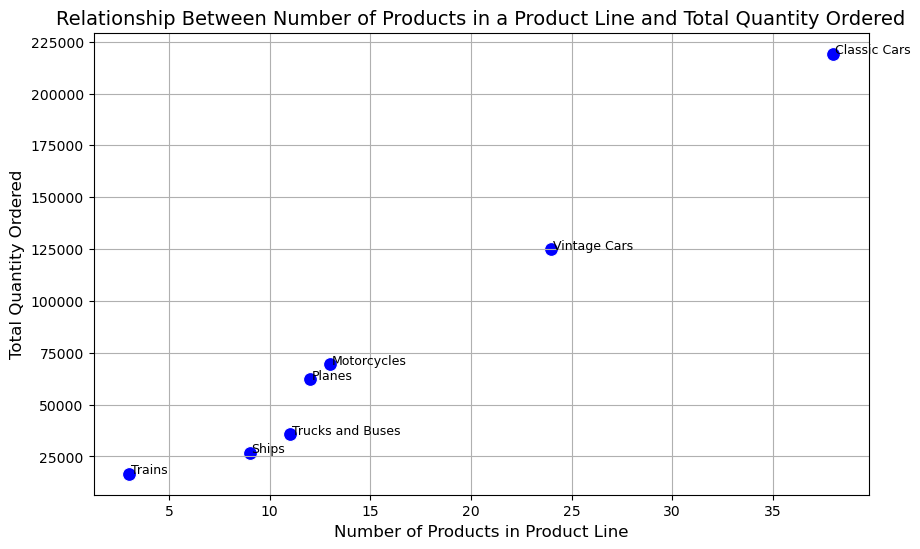

In [30]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df3,
    x='NumberOfProducts',
    y='TotalQuantityInStock',
    s=100,  # size of points
    color='blue'
)

# Add labels for each point (optional, for clarity)
for i in range(df3.shape[0]):
    plt.text(
        x=df3['NumberOfProducts'][i]+0.1, 
        y=df3['TotalQuantityInStock'][i], 
        s=df3['ProductLineName'][i],
        fontsize=9
    )

plt.title('Relationship Between Number of Products in a Product Line and Total Quantity Ordered', fontsize=14)
plt.xlabel('Number of Products in Product Line', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize=12)
plt.grid(True)
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer
Scatter plots are ideal for showing how two numeric variables relate to each other, it allows you to see whether product lines with more products tend to have higher total orders.
Each point represents a product line (like “Classic Cars” or “Trains”), which makes it easy to compare both the number of products and the total quantities at a glance.
From the plot, it’s clear that product lines with more products (like Classic Cars) have much higher total quantities ordered, while smaller product lines (like Trains) have lower totals. This immediately conveys the trend that larger product lines tend to sell more overall.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [37]:
# Replace None with your code
q4= """ SELECT 
    e.employeeNumber,
    e.firstName,
    e.lastName,
    e.jobTitle,
    e.reportsTo AS SupervisorID,
    s.firstName || ' ' || s.lastName AS SupervisorName,
    e.officeCode
FROM 
    employees e
LEFT JOIN 
    employees s ON e.reportsTo = s.employeeNumber
WHERE 
    e.officeCode IN (
        SELECT officeCode
        FROM employees
        GROUP BY officeCode
        HAVING COUNT(*) < 5
    )
ORDER BY e.officeCode, e.lastName;"""
pd.read_sql(q4,conn)

,employeeNumber,firstName,lastName,jobTitle,SupervisorID,SupervisorName,officeCode
0,1188,Julie,Firrelli,Sales Rep,1143,Anthony Bow,2
1,1216,Steve,Patterson,Sales Rep,1143,Anthony Bow,2
2,1286,Foon Yue,Tseng,Sales Rep,1143,Anthony Bow,3
3,1323,George,Vanauf,Sales Rep,1143,Anthony Bow,3
4,1625,Yoshimi,Kato,Sales Rep,1621,Mami Nishi,5
5,1621,Mami,Nishi,Sales Rep,1056,Mary Patterson,5
6,1611,Andy,Fixter,Sales Rep,1088,William Patterson,6
7,1619,Tom,King,Sales Rep,1088,William Patterson,6
8,1612,Peter,Marsh,Sales Rep,1088,William Patterson,6
9,1088,William,Patterson,Sales Manager (APAC),1056,Mary Patterson,6


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!
Decided to use a subquery to identify the offices with fewer than 5 employees because the main goal was to filter employees based on the size of their office. Since the information about office size is not stored directly in a separate table, I needed to calculate it dynamically by counting the number of employees per office.
#### Subquery logic:
SELECT OfficeID FROM Employees GROUP BY OfficeID HAVING COUNT(*) < 5
This groups all employees by their office and counts how many employees are in each office.
The HAVING clause filters for only those offices with fewer than 5 employees.
#### Main query integration:
The main query retrieves all employee details and their supervisor information.
Using WHERE e.OfficeID IN (subquery), I filter the employees to include only those who work in small offices.
Reasoning for using a subquery:
Using a subquery here keeps the query readable and efficient
It allows me to calculate office sizes on the fly and immediately use that result to filter the employee data without creating a temporary table or complex joins.
Overall, the subquery acts as a dynamic filter that feeds the main query only the relevant office IDs, ensuring that only employees from offices with fewer than 5 people are included.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [38]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [42]:
# Run this cell without changes
import zipfile

#zip_file_path = 'im.db.zip'
#extract_to_path = './'

#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [ ]:
# Begin your code here
None